In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import cv2
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [5]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [6]:
#Checking the shape of data
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [7]:
#the image data is already converted into numpy arrays and the same of one image can be viewed
print(X_train[2005])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 141 255 254 124
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  11 247 253 253 230
    9   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  28 197 253 253 253 253
  138   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  88 253 253 253 253 250
  121   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  69 241 253 253 253 253 148
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  42 235 253 253 253 25

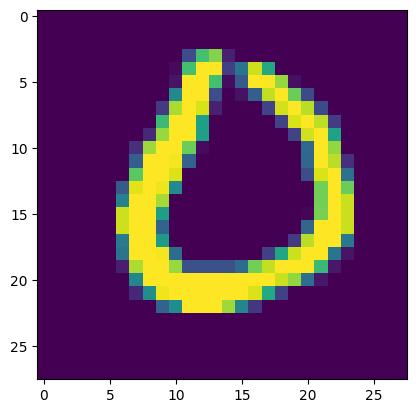

0


In [8]:
#Plotting the image of previous train data and its corresponding training label

plt.imshow(X_train[2500])
plt.show()

print(Y_train[2500])

In [9]:
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


In [10]:
input_shape = (28,28,1)
output_class = 10

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import tensorflow as tf

# Define the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\rsrip\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.fit(x=X_train, y=Y_train, batch_size=32, epochs=15, validation_data=(X_test, Y_test))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7376 - loss: 1.5416 - val_accuracy: 0.9792 - val_loss: 0.0714
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9580 - loss: 0.1481 - val_accuracy: 0.9842 - val_loss: 0.0528
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9691 - loss: 0.1059 - val_accuracy: 0.9846 - val_loss: 0.0573
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9750 - loss: 0.0866 - val_accuracy: 0.9853 - val_loss: 0.0504
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9784 - loss: 0.0728 - val_accuracy: 0.9893 - val_loss: 0.0383
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9811 - loss: 0.0645 - val_accuracy: 0.9896 - val_loss: 0.0333
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9836 - loss: 0.0590 - val_accuracy: 0.9879 - val_loss: 0.0486
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9818 - loss: 0

In [13]:
#Training accuracy is 97.75 lets compute the Testing accuracy as well

loss,accuracy=model.evaluate(X_test,Y_test)
print("Accuracy of Testing is ",accuracy*100,"%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9874 - loss: 0.0605
Accuracy of Testing is  98.94999861717224 %


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted output: 0


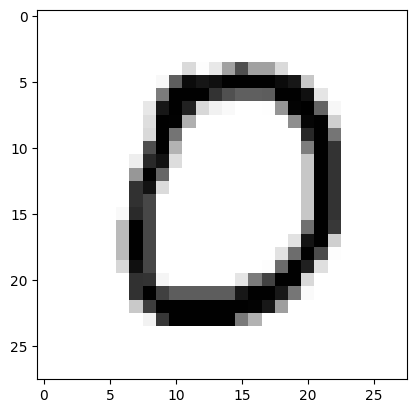

In [14]:
image_index = 10
# print("Original output:",y_test[image_index])
plt.imshow(X_test[image_index].reshape(28,28), cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1,28,28,1))
print("Predicted output:", pred.argmax())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted output: 6


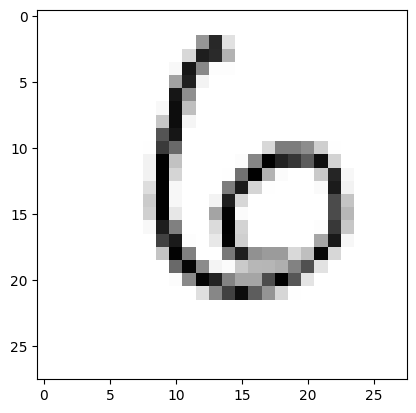

In [15]:
image_index = 100
# print("Original output:",y_test[image_index])
plt.imshow(X_test[image_index].reshape(28,28), cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1,28,28,1))
print("Predicted output:", pred.argmax())


In [16]:
model.save('digits.h5')